# Load Data

In [227]:
# Author: Osama Alghmyan 300218382

import pandas as pd
RS = 42
data = pd.read_csv('./bankDataset/bank-full.csv', sep=';')

# Explore Data

In [208]:
# Author: Osama Alghmyan 300218382

print(data.head())
print(data.tail())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
       age           job   marital  education default  balance housing loan  \
45206   51    technician   marri

In [121]:
# Author: Osama Alghmyan 300218382

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None


In [122]:
# Author: Osama Alghmyan 300218382

print(data.nunique())

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64


In [123]:
# Author: Osama Alghmyan 300218382

print("Check for missing values:\n", data.isnull().sum())

Check for missing values:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [209]:
# Author: Osama Alghmyan 300218382

duplicates = data[data.duplicated()]

if not duplicates.empty:
    print("Duplicates found in the dataset:")
    print(duplicates)
else:
    print("No duplicates found in the dataset.")

No duplicates found in the dataset.


# Data Preprocessing

In [228]:
# Author: Osama Alghmyan 300218382

poutcome_unknown_count = (data['poutcome'] == 'unknown').sum()
poutcome_other_count = (data['poutcome'] == 'other').sum()

poutcome_count = len(data['poutcome'])

percentage_unknown = poutcome_unknown_count / poutcome_count
percentage_other = poutcome_other_count / poutcome_count

print("Precentage of unknowns in poutcome", percentage_unknown)
print("Precentage of others in poutcome", percentage_other)

data = data.drop(columns=['poutcome'])

Precentage of unknowns in poutcome 0.8174780473778506
Precentage of others in poutcome 0.040698060206586895


In [229]:
# Author: Osama Alghmyan 300218382

unknown_perc_cols = (data == "unknown").mean() * 100
col_with_highest_perc_id = unknown_perc_cols.idxmax()
col_with_highest_perc_val = unknown_perc_cols.max()

print("Precentage of unknown per column:\n\n", unknown_perc_cols, '\n')
print("Column with the highest precentage of unknown:", col_with_highest_perc_id, 'value:', col_with_highest_perc_val,'\n')

unknown_perc_rows = (data == "unknown").mean(axis=1) * 100
row_with_highest_perc_id = unknown_perc_rows.idxmax()
row_with_highest_perc_val = unknown_perc_rows.max()

print("Precentage of unknown per row:", unknown_perc_rows, '\n')
print("Row with the highest precentage of unknown:", row_with_highest_perc_id, 'value:', row_with_highest_perc_val,'\n')

data = data.drop(row_with_highest_perc_id)

Precentage of unknown per column:

 age           0.000000
job           0.637013
marital       0.000000
education     4.107407
default       0.000000
balance       0.000000
housing       0.000000
loan          0.000000
contact      28.798301
day           0.000000
month         0.000000
duration      0.000000
campaign      0.000000
pdays         0.000000
previous      0.000000
y             0.000000
dtype: float64 

Column with the highest precentage of unknown: contact value: 28.798301298356595 

Precentage of unknown per row: 0         6.25
1         6.25
2         6.25
3        12.50
4        18.75
         ...  
45206     0.00
45207     0.00
45208     0.00
45209     0.00
45210     0.00
Length: 45211, dtype: float64 

Row with the highest precentage of unknown: 4 value: 18.75 



In [133]:
# Author: Osama Alghmyan 300218382

data.boxplot()

<Axes: >

In [230]:
# Author: Osama Alghmyan 300218382

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = le.fit_transform(data[column])

In [220]:
from sklearn.metrics import accuracy_score, roc_curve, auc, f1_score
import time
import matplotlib.pyplot as plt

def evaluation(model, X_test, y_test):
    # Predict on test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    print("F1: ", f1_score(y_test, y_pred))
    # print("Runtime:", etime - stime / 60, 'min(s)')


    # Keep probabilities for the positive outcome only
    probs = model.predict_proba(X_test)
    pred_prob = probs[:, 1]

    fpr, tpr, thresholds = roc_curve(y_test, pred_prob)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('supervised ROC curve')
    plt.show()

# Supervised Model

Accuracy:  0.8823269188232692
F1:  0.5588723051409619


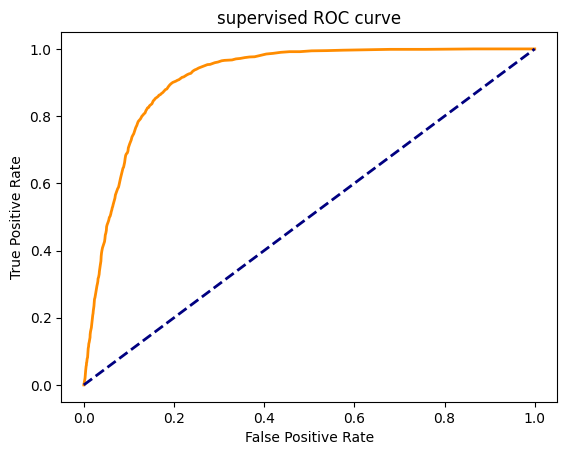

In [238]:
# Author: Osama Alghmyan 300218382

from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier


RS = 56

X = data.drop('y', axis=1)
y = data['y']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RS)

# SMOTE for handling class imbalance
smote = SMOTE(random_state=RS)
X_res, y_res = smote.fit_resample(X_train, y_train)

# Random Forest with hyperparameter tuning
rf = RandomForestClassifier(random_state=RS)

# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Use GridSearchCV for finding the best hyperparameters and fitting the model
grid_search = GridSearchCV(rf, param_grid, cv=2, scoring='accuracy')

stime = time.time()
grid_search.fit(X_res, y_res)
etime = time.time()

# Use the best estimator found
best_rf = grid_search.best_estimator_

evaluation(best_rf, X_test, y_test)


# Unlabeled dataset creation

Metrics for self-training SSL at 50.0% unlabeled data:

Accuracy:  0.9477254294772542
F1:  0.7448722562072688


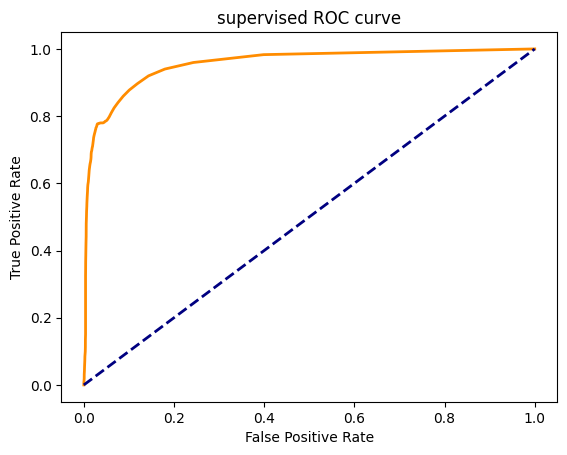

Metrics for co-training SSL at 50.0% unlabeled data:

classifier1:

Accuracy:  0.8700515084621044
F1:  0.23016564952048824


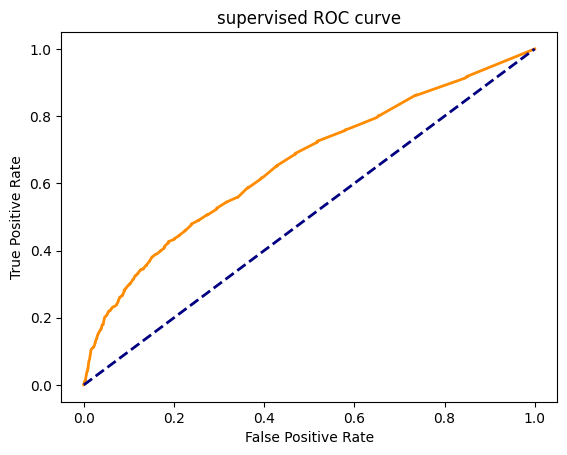

classifier2:

Accuracy:  0.9050772626931567
F1:  0.5309090909090909


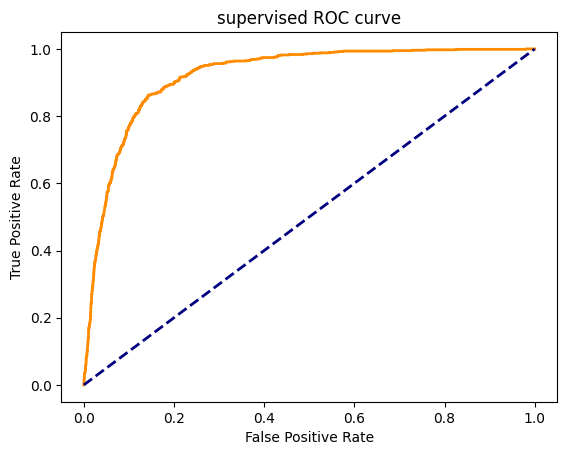

Metrics for self-training SSL at 75.0% unlabeled data:

Accuracy:  0.9191919191919192
F1:  0.5375527426160338


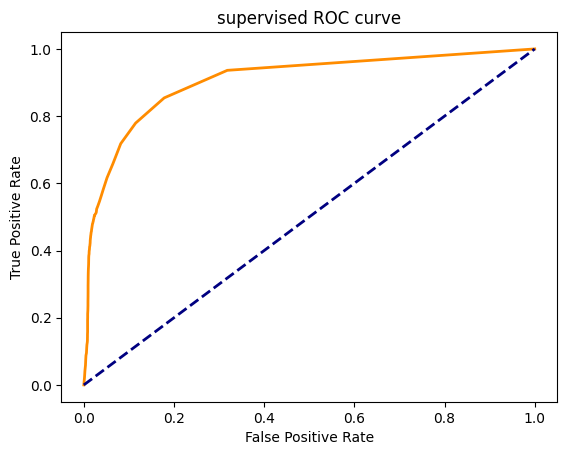

Metrics for co-training SSL at 75.0% unlabeled data:

classifier1:

Accuracy:  0.8743378457916421
F1:  0.16764132553606237


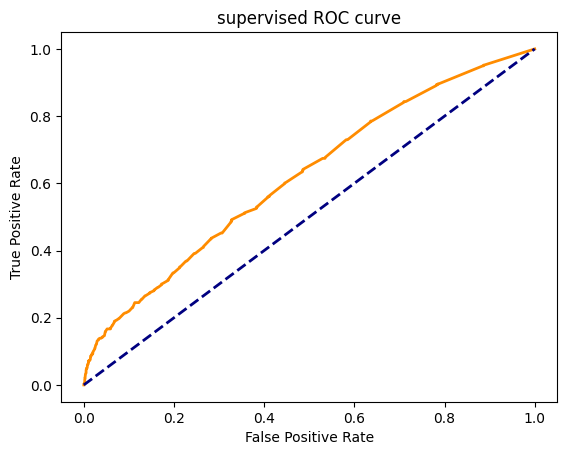

classifier2:

Accuracy:  0.8990582695703355
F1:  0.4918518518518519


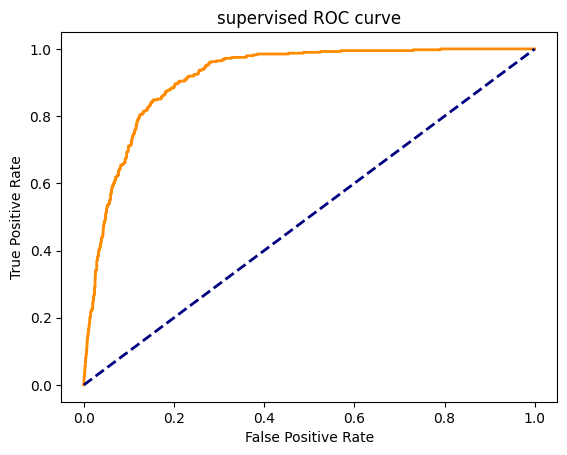

Metrics for self-training SSL at 90.0% unlabeled data:

Accuracy:  0.9016441790164418
F1:  0.36777251184834125


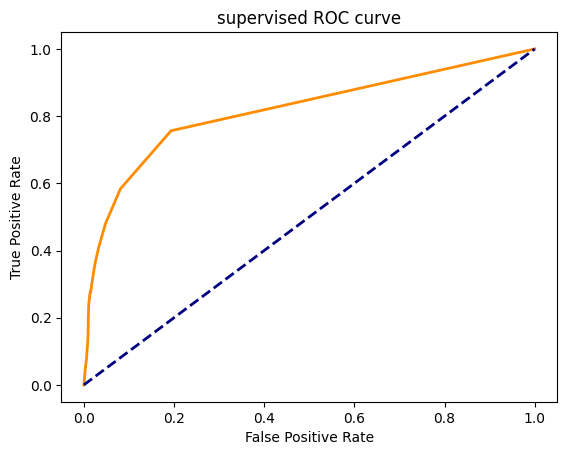

Metrics for co-training SSL at 90.0% unlabeled data:

classifier1:

Accuracy:  0.8679104477611941
F1:  0.14492753623188406


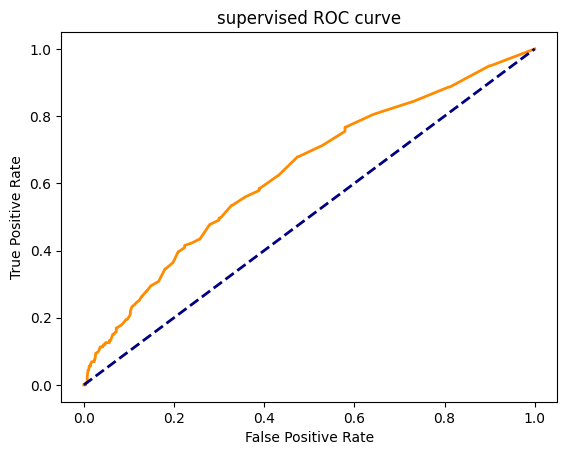

classifier2:

Accuracy:  0.8843283582089553
F1:  0.495114006514658


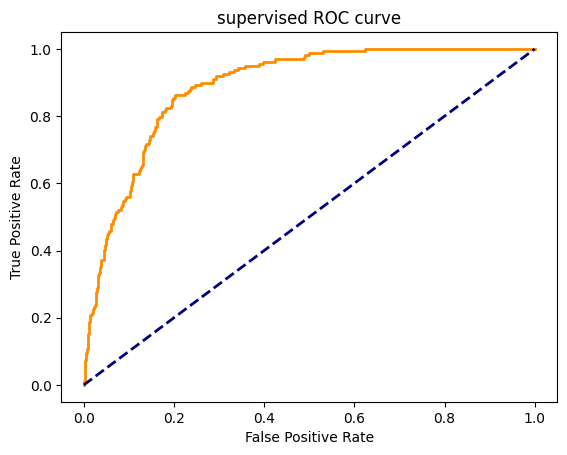

Metrics for self-training SSL at 95.0% unlabeled data:

Accuracy:  0.890879598908796
F1:  0.1859185918591859


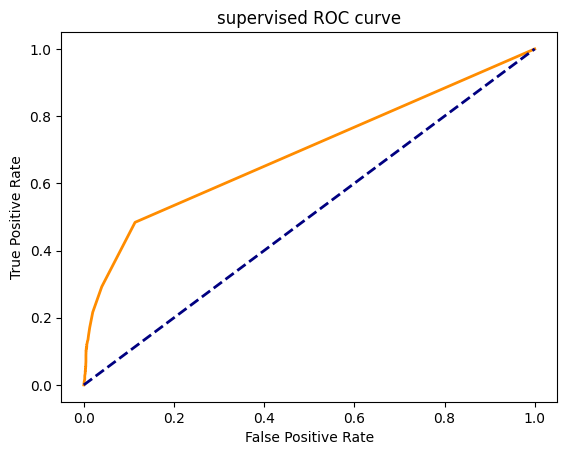

Metrics for co-training SSL at 95.0% unlabeled data:

classifier1:

Accuracy:  0.8681481481481481
F1:  0.1188118811881188


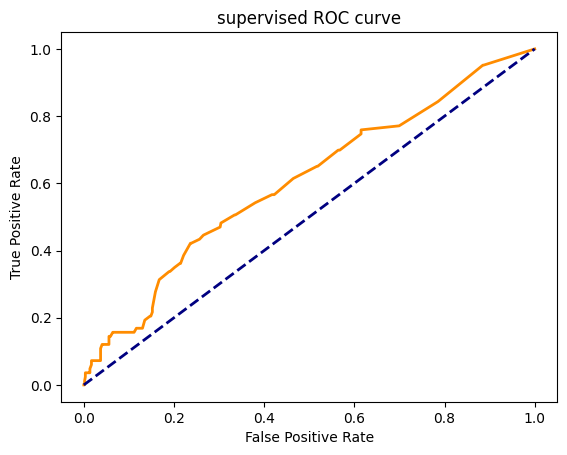

classifier2:

Accuracy:  0.88
F1:  0.34146341463414637


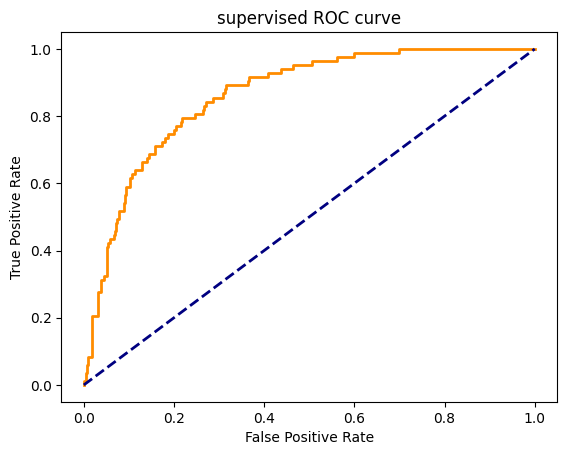

Metrics for self-training SSL at 99.0% unlabeled data:

Accuracy:  0.8841701688417017
F1:  0.017510944340212633


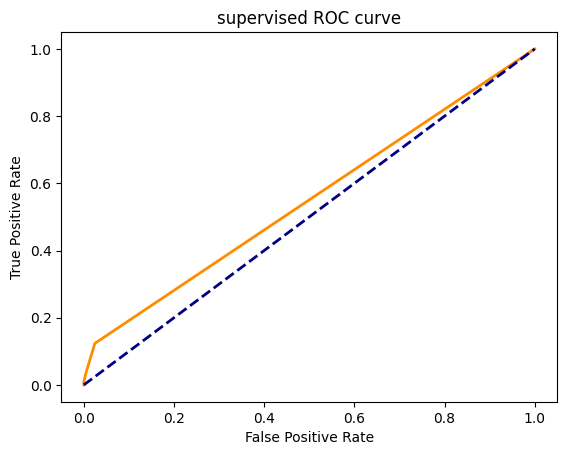

Metrics for co-training SSL at 99.0% unlabeled data:

classifier1:

Accuracy:  0.9185185185185185
F1:  0.0


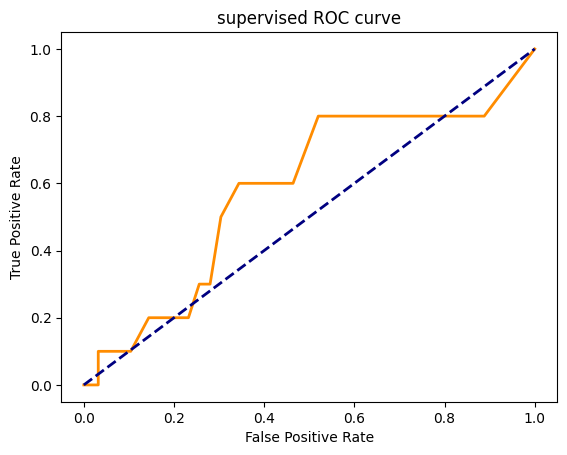

classifier2:

Accuracy:  0.9037037037037037
F1:  0.3157894736842105


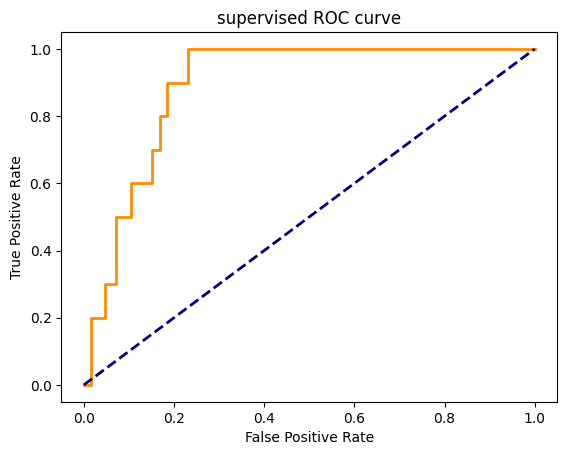

In [237]:
# Author: Osama Alghmyan 300218382

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

rng = np.random.RandomState(RS)
unlabelled_proportions = [0.5, 0.75, 0.9, 0.95, 0.99]
for prop in unlabelled_proportions:
    random_unlabeled_points = rng.rand(data['y'].shape[0]) < prop
    unlabel_dataset = data.copy()
    unlabel_dataset.loc[random_unlabeled_points, 'y'] = -1
    
    st = selfTrainingModel(RandomForestClassifier(), unlabel_dataset.copy())
    print(f'Metrics for self-training SSL at {prop * 100}% unlabeled data:\n')
    evaluation(st, X_test, y_test)

    clf1, clf2, X_test_1, X_test_2, y_test_ct = cotrainingModel(RandomForestClassifier(), XGBClassifier(), unlabel_dataset.copy())
    print(f'Metrics for co-training SSL at {prop * 100}% unlabeled data:\n')

    print(f'classifier1:\n')
    evaluation(clf1, X_test_1, y_test_ct)
    
    print(f'classifier2:\n')
    evaluation(clf2, X_test_2, y_test_ct)



    # # print("Runtime:", etime - stime / 60, 'min(s)')

# Self-training SSL

In [187]:
# Author: Osama Alghmyan 300218382

from sklearn.semi_supervised import SelfTrainingClassifier
def selfTrainingModel(baseModel, unlabel_dataset):
    self_training_model = SelfTrainingClassifier(baseModel)
    self_training_model.fit(unlabel_dataset.drop('y', axis=1), unlabel_dataset['y'])
    
    return self_training_model

# Co-training SSL

In [235]:
# Author: Osama Alghmyan 300218382

def cotrainingModel(clf1, clf2, unlabel_dataset, n_iterations = 10, n_labels = 10):
    # Split the data into labeled and unlabeled sets
    labeled_data = unlabel_dataset[unlabel_dataset['y'] != -1]
    unlabeled_data = unlabel_dataset[unlabel_dataset['y'] == -1]

    # Split labeled data into training and test sets
    X_labeled = labeled_data.drop('y', axis=1)
    y_labeled = labeled_data['y']

    X_train_ct, X_test_ct, y_train_ct, y_test_ct = train_test_split(X_labeled, y_labeled, test_size=0.3)

    # Split features for co-training
    set_of_features_1 = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
        'loan']
    set_of_features_2 = ['contact', 'day', 'month', 'duration', 'campaign', 'pdays',
        'previous']

    X_train_1 = X_train_ct[set_of_features_1]
    X_train_2 = X_train_ct[set_of_features_2]

    y_train_1 = y_train_ct
    y_train_2 = y_train_ct

    X_test_1 = X_test_ct[set_of_features_1]
    X_test_2 = X_test_ct[set_of_features_2]

    # Train both classifiers on the labeled data
    clf1.fit(X_train_1, y_train_ct)
    clf2.fit(X_train_2, y_train_ct)

    for _ in range(n_iterations):
        # Use clf1 to label data and add to clf2's training set
        if len(unlabeled_data) > 0:
            unlabeled_X1 = unlabeled_data[set_of_features_1]
            pred_y1 = clf1.predict(unlabeled_X1)
            
            # Select n_labels instances clf1 is most confident about
            pred_proba1 = clf1.predict_proba(unlabeled_X1).max(axis=1)
            confident_indices1 = np.argsort(pred_proba1)[-n_labels:]
            add_to_train2_X = unlabeled_data.iloc[confident_indices1][set_of_features_2]
            add_to_train2_y = pred_y1[confident_indices1]

            # Update the training set for clf2
            X_train_2 = pd.concat([X_train_2, add_to_train2_X])
            y_train_2 = pd.concat([y_train_2, pd.Series(add_to_train2_y)]) 
            
            # Remove labeled instances from the unlabeled data
            unlabeled_data = unlabeled_data.drop(unlabeled_data.index[confident_indices1])

            # Retrain clf2
            clf2.fit(X_train_2, y_train_2)

        # Use clf2 to label data and add to clf1's training set
        if len(unlabeled_data) > 0:
            unlabeled_X2 = unlabeled_data[set_of_features_2]
            pred_y2 = clf2.predict(unlabeled_X2)
            
            # Select n_labels instances clf2 is most confident about
            pred_proba2 = clf2.predict_proba(unlabeled_X2).max(axis=1)
            confident_indices2 = np.argsort(pred_proba2)[-n_labels:]
            add_to_train1_X = unlabeled_data.iloc[confident_indices2][set_of_features_1]
            add_to_train1_y = pred_y2[confident_indices2]

            # Update the training set for clf1
            X_train_1 = pd.concat([X_train_1, add_to_train1_X])
            y_train_1 = pd.concat([y_train_1, pd.Series(add_to_train1_y)])
            
            # Remove labeled instances from the unlabeled data
            unlabeled_data = unlabeled_data.drop(unlabeled_data.index[confident_indices2])

            # Retrain clf1
            clf1.fit(X_train_1, y_train_1)

    return (clf1, clf2, X_test_1, X_test_2, y_test_ct)